# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-28 17:00:09.795894


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/27/20


,9/27/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7115008,204756,2.88
Brazil,4732309,141741,3.00
India,6074702,95542,1.57
Mexico,730317,76430,10.47
United Kingdom,437517,42077,9.62
Italy,309870,35835,11.56
Peru,800142,32142,4.02


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/27/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
43247,US,7032712,2020-09-25,203750.0,952.0,55054.0,44111.285714
43246,US,6977658,2020-09-24,202798.0,914.0,44110.0,43188.571429
43245,US,6933548,2020-09-23,201884.0,1098.0,37630.0,43277.714286
43244,US,6895918,2020-09-22,200786.0,921.0,39034.0,43333.428571
43243,US,6856884,2020-09-21,199865.0,356.0,52070.0,43318.857143
43242,US,6804814,2020-09-20,199509.0,227.0,36695.0,40670.285714
43241,US,6768119,2020-09-19,199282.0,712.0,44186.0,40428.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/27/20


,9/27/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,455626,33131.0,7.27
New Jersey,203548,16106.0,7.91
Texas,758756,15745.0,2.08
California,809890,15606.0,1.93
Florida,700564,14032.0,2.00
Massachusetts,130642,9404.0,7.20
Illinois,290373,8845.0,3.05


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/27/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1497,California,803660,2020-09-25,15516.0,123.0,4144.0,3452.714286
1496,California,799516,2020-09-24,15393.0,102.0,3080.0,3497.000000
1495,California,796436,2020-09-23,15291.0,102.0,3371.0,3587.857143
1494,California,793065,2020-09-22,15189.0,133.0,2969.0,3551.571429
1493,California,790096,2020-09-21,15056.0,40.0,3928.0,3566.000000
1492,California,786168,2020-09-20,15016.0,-2.0,2855.0,3491.428571
1491,California,783313,2020-09-19,15018.0,125.0,3822.0,3482.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/27/20


,9/27/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,267801,6514.0,2.43
Orange,53315,1216.0,2.28
Riverside,58178,1189.0,2.04
San Bernardino,54478,925.0,1.70
San Diego,46610,776.0,1.66
San Joaquin,20194,441.0,2.18
Sacramento,22269,406.0,1.82


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/27/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4747,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4746,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4745,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571
4744,Los Angeles,262133,2020-09-22,6401.0,35.0,687.0,1012.000000
4743,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000
4742,Los Angeles,260797,2020-09-20,6353.0,23.0,980.0,973.142857
4741,Los Angeles,259817,2020-09-19,6330.0,0.0,1301.0,948.714286
4740,Los Angeles,258516,2020-09-18,6330.0,6.0,1245.0,921.428571
4739,Los Angeles,257271,2020-09-17,6324.0,21.0,1123.0,892.428571
4738,Los Angeles,256148,2020-09-16,6303.0,30.0,1099.0,898.428571



7 day new US cases as of 9/27/20


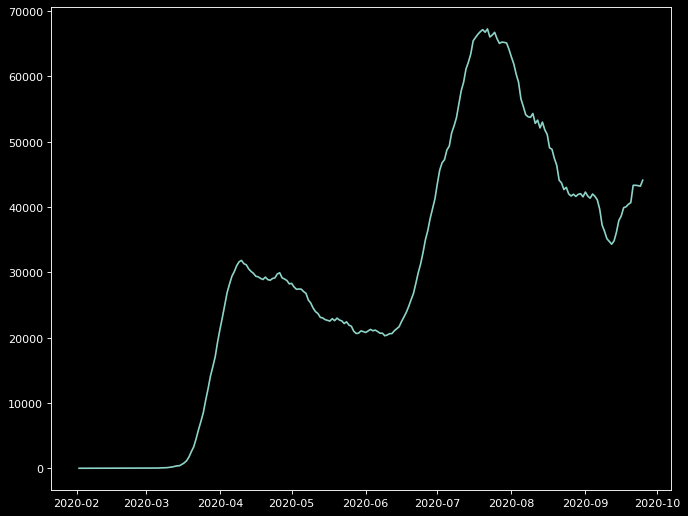

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/27/20


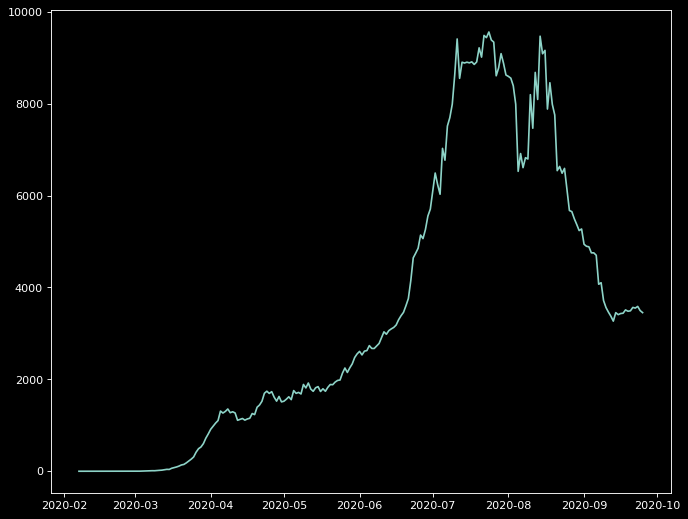

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/27/20


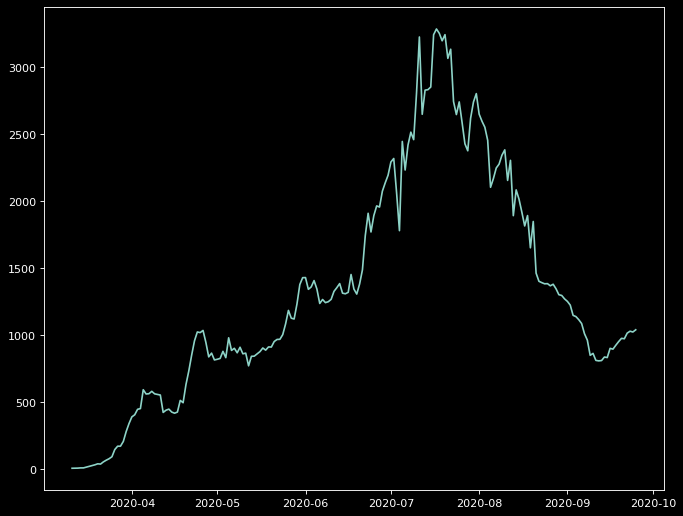

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()